# **Treinamento de objetos personalizados com YOLOv3 e Darknet**


# **Habilitando e testando a GPU.**

In [1]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Sun Feb  9 21:47:37 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# **Conectando ao Google Drive**

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Exibindo o conteúdo do arquivo customa.names, com as classes que serão detectadas durante o treinamento

In [47]:
!cat /content/gdrive/MyDrive/darknet/custom_data/custom.names

fish
jellyfish
penguin
puffin
shark
starfish
stingray

# **Clonando Diretório para usar a Darknet.**

In [5]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15873, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 15873 (delta 12), reused 7 (delta 7), pack-reused 15850 (from 3)
Receiving objects: 100% (15873/15873), 14.50 MiB | 13.50 MiB/s, done.
Resolving deltas: 100% (10679/10679), done.


In [6]:
%cd darknet

/content/darknet


### Alterar o makefile para ter GPU e OPENCV habilitados e outros parâmetros para um processamento mais rápida.

In [7]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

### Compila o modelo

In [9]:
!make

mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  945 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1443:14: wa

# **Baixando pesos pré-treinados.**

In [10]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2025-02-09 21:56:02--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  10.6MB/s    in 14s     

2025-02-09 21:56:16 (11.4 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



# **Treinando o modelo**

In [ ]:
!./darknet detector train \
/content/gdrive/MyDrive/darknet/custom_data/detector.data \
/content/gdrive/MyDrive/darknet/custom_data/cfg/yolov3-custom.cfg \
darknet53.conv.74 -dont_show

## **Continue o treinamento de onde você parou.**
O treinamento do seu modelo pode ser interrompido devido a vários motivos, como tempo limite do notebook, falhas do notebook, devido a problemas de rede e muitos outros, então você pode iniciar seu treinamento de onde parou, passando os pesos treinados anteriormente.

In [ ]:
# !./darknet detector train \
# /content/gdrive/MyDrive/darknet/custom_data/detector.data \
# /content/gdrive/MyDrive/darknet/custom_data/cfg/yolov3-custom.cfg \
# /content/gdrive/MyDrive/darknet/custom_data/backup/yolov3-custom_last.weights \
# -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.786433), count: 12, class_loss = 0.379418, iou_loss = 0.484677, total_loss = 0.864096 
 total_bbox = 1250611, rewritten_bbox = 0.216934 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.821659), count: 6, class_loss = 0.300368, iou_loss = 0.179394, total_loss = 0.479762 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.816791), count: 3, class_loss = 0.301000, iou_loss = 0.134649, total_loss = 0.435649 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.022837, iou_loss = 0.000000, total_loss = 0.022837 
 total_bbox = 1250620, rewritten_bbox = 0.216932 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.869283), count: 9, class_loss = 0.081043, iou_loss = 0.125822, total_loss = 0.206864 
v3

# **Calculando a precisão média.**

In [49]:
!./darknet detector map \
/content/gdrive/MyDrive/darknet/custom_data/detector.data \
/content/gdrive/MyDrive/darknet/custom_data/cfg/yolov3-custom.cfg \
/content/gdrive/MyDrive/darknet/custom_data/backup/yolov3-custom_final.weights -dont_show

 CUDA-version: 12050 (12040)
, cuDNN: 9.2.1, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.5

# **Altera o arquivo coco.names para incluir as classes utilizadas no treinamento.**

In [50]:
!cp /content/gdrive/MyDrive/darknet/custom_data/custom.names /content/darknet/data/coco.names

In [51]:
!cat /content/darknet/data/coco.names

fish
jellyfish
penguin
puffin
shark
starfish
stingray

# **Exibe a imagem que será usada de teste para a deteção.**

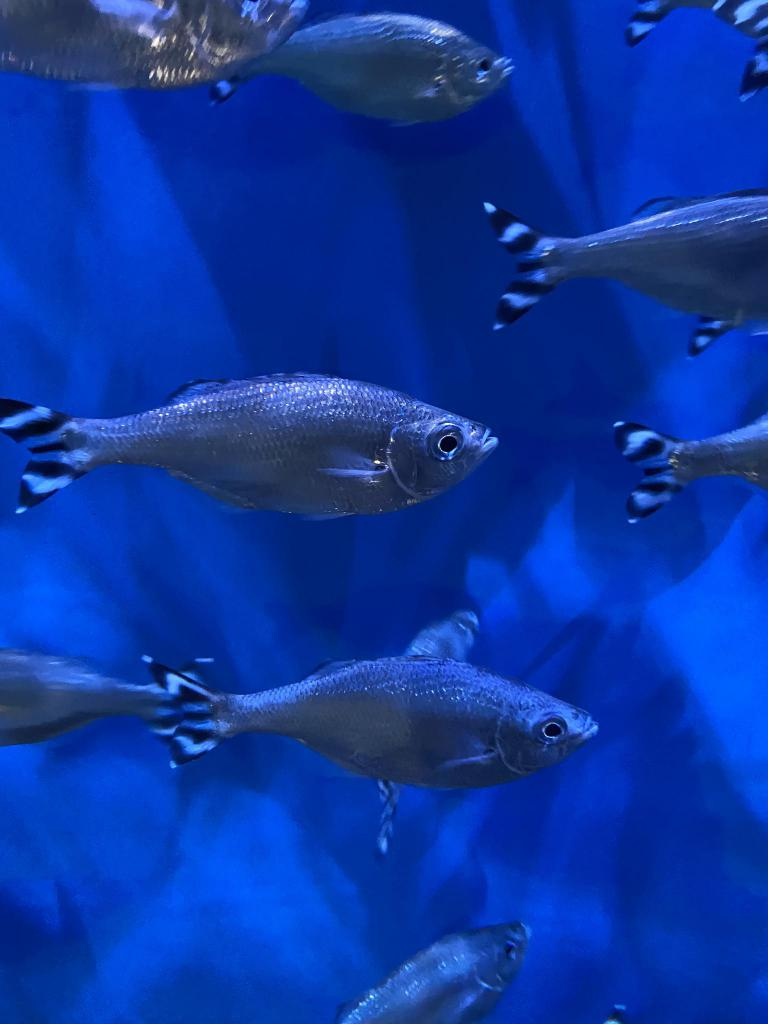

In [52]:
from IPython.display import Image
Image('/content/gdrive/MyDrive/darknet/custom_data/images/valid/IMG_2278_jpeg_jpg.rf.3c7006d683b0fc62b9b5d84a2868c31c.jpg')

# **Faz a detecção dos objetos.**

In [53]:
!./darknet detect \
/content/gdrive/MyDrive/darknet/custom_data/cfg/yolov3-custom-testing.cfg \
/content/gdrive/MyDrive/darknet/custom_data/backup/yolov3-custom_final.weights \
/content/gdrive/MyDrive/darknet/custom_data/images/valid/IMG_2278_jpeg_jpg.rf.3c7006d683b0fc62b9b5d84a2868c31c.jpg


 CUDA-version: 12050 (12040)
, cuDNN: 9.2.1, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.59

# **Resultado da detecção.**

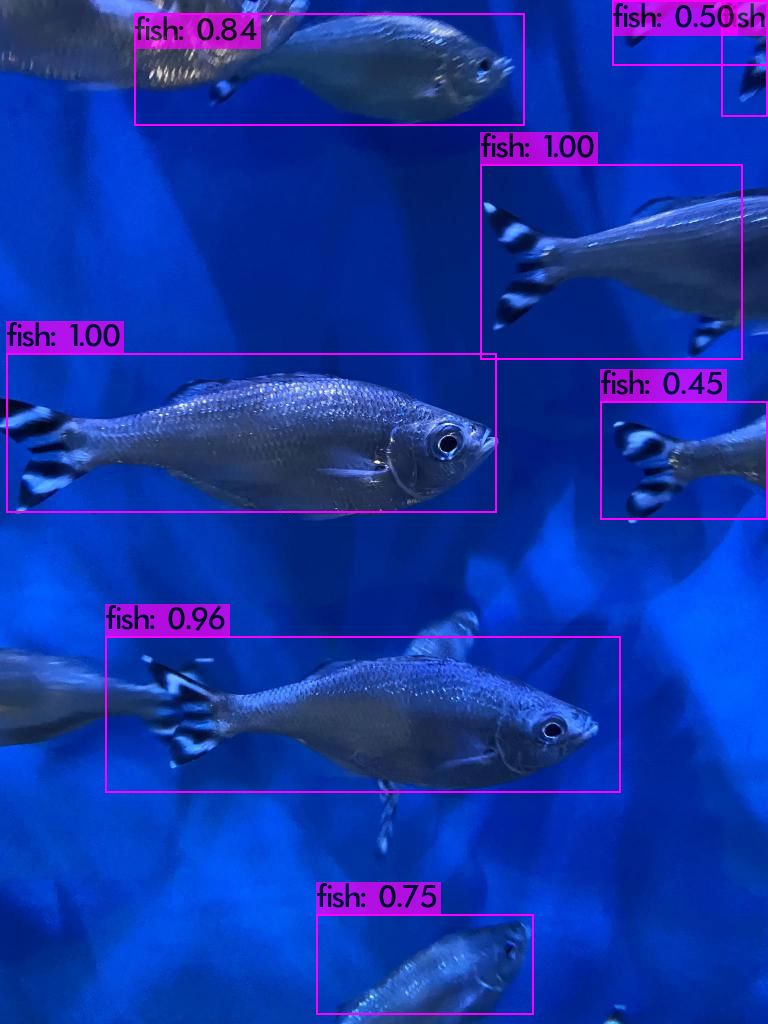

In [54]:
from IPython.display import Image
Image('/content/darknet/predictions.jpg')